## Dataset preparation from online for custom YOLO

In [1]:
from google_images_download import google_images_download
import os
original_path = os.getcwd()
data_path = os.path.join(os.path.dirname(original_path),'downloads')
response = google_images_download.googleimagesdownload()
search_queries = ['picture with dogs']

In [2]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    output_directory=data_path,
                    chromedriver='C:\\Users\\sungsooc\\Documents\\chromedriver_win32\\chromedriver.exe', 
                    silent_mode=True)   
    response.download(arguments)                          

In [3]:
download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 807 is all we got for this search filter!
Downloaded 807 picture with dogs images!


In [4]:
working_dir = os.path.join(data_path,'picture with dogs')
os.chdir(working_dir)
current_list = os.listdir(os.getcwd())
for i in range(len(os.listdir(working_dir))):
    original_name = current_list[i]
    new_name = "".join('picture with dogs'.split()) + '_{:04d}'.format(i+1) + os.path.splitext(original_name)[-1]
    if not os.path.exists(new_name):
        os.rename(original_name,new_name)
os.chdir(original_path)

## Labeling using labelimg_v1.8.0 ([source](https://github.com/tzutalin/labelImg))
### 2 classes: 
* **"d" : dog (general)**
* **"dd" : detectable dog that is feedable to HDC_v2**
<p align="center">
<img src="../Readme_images/custom_YOLO_labelling_example.png" width="700"></p>
</p>

## Import modules

In [5]:
from darkflow.net.build import TFNet
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.models import load_model
import datetime as dt
import time

Using TensorFlow backend.


## Config custom darkflow

In [6]:
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    options = {
        'model':os.path.join('cfg','yolov2_hddv2.cfg'), ## for custom model
        'load':os.path.join('bin','yolov2.weights'),
        'epoch':30,
        'batch':4,
        'train':True,
        'dataset':os.path.join('..','downloads','picture with dogs'),
        'annotation':os.path.join('..','downloads','picture with dogs-annot'),
        'gpu':0.8
    }
    tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg\yolov2_hddv2.cfg
Loading bin\yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.01595759391784668s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      |

In [7]:
tfnet.train()


cfg\yolov2_hddv2.cfg parsing ..\downloads\picture with dogs-annot
Parsing for ['d', 'dd'] 
[====================>]100%  picturewithdogs_0540.xml
Statistics:
d: 270
dd: 368
Dataset size: 450
Dataset of 450 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 4
	Epoch number  : 30
	Backup every  : 2000
step 1 - loss 221.1216583251953 - moving ave loss 221.1216583251953
step 2 - loss 218.09873962402344 - moving ave loss 220.81936645507812
step 3 - loss 216.6937255859375 - moving ave loss 220.40680236816408
step 4 - loss 214.16806030273438 - moving ave loss 219.78292816162113
step 5 - loss 213.37879943847656 - moving ave loss 219.1425152893067
step 6 - loss 212.92633056640625 - moving ave loss 218.52089681701665
step 7 - loss 210.06944274902344 - moving ave loss 217.67575141021732
step 8 - loss 211.10726928710938 - moving ave loss 217.01890319790652
step 9 - loss 209.27743530273438 - moving ave loss 216.24475640838932
step 10 - loss 208.10308837890625 - moving ave los

step 113 - loss 125.69761657714844 - moving ave loss 134.29204365811358
step 114 - loss 125.93790435791016 - moving ave loss 133.45662972809325
step 115 - loss 122.79893493652344 - moving ave loss 132.39086024893626
step 116 - loss 121.85432434082031 - moving ave loss 131.33720665812467
step 117 - loss 120.51693725585938 - moving ave loss 130.25517971789816
step 118 - loss 120.71054077148438 - moving ave loss 129.30071582325678
step 119 - loss 118.62592315673828 - moving ave loss 128.23323655660494
step 120 - loss 123.38037872314453 - moving ave loss 127.7479507732589
step 121 - loss 118.03093719482422 - moving ave loss 126.77624941541544
step 122 - loss 116.80384826660156 - moving ave loss 125.77900930053406
step 123 - loss 114.11060333251953 - moving ave loss 124.6121687037326
step 124 - loss 113.98173522949219 - moving ave loss 123.54912535630856
step 125 - loss 120.88072204589844 - moving ave loss 123.28228502526756
step 126 - loss 112.84515380859375 - moving ave loss 122.238571903

step 230 - loss 56.24424743652344 - moving ave loss 60.50857959677356
step 231 - loss 54.22732162475586 - moving ave loss 59.8804537995718
step 232 - loss 57.75920104980469 - moving ave loss 59.66832852459509
step 233 - loss 55.9495849609375 - moving ave loss 59.29645416822933
step 234 - loss 58.175453186035156 - moving ave loss 59.18435407000992
step 235 - loss 55.36076354980469 - moving ave loss 58.8019950179894
step 236 - loss 54.748573303222656 - moving ave loss 58.39665284651272
step 237 - loss 55.662139892578125 - moving ave loss 58.123201551119266
step 238 - loss 54.14623260498047 - moving ave loss 57.725504656505386
step 239 - loss 54.2163200378418 - moving ave loss 57.37458619463903
step 240 - loss 50.89633560180664 - moving ave loss 56.726761135355794
step 241 - loss 54.9368896484375 - moving ave loss 56.54777398666396
step 242 - loss 50.402984619140625 - moving ave loss 55.93329504991163
step 243 - loss 53.34246826171875 - moving ave loss 55.674212371092345
step 244 - loss 5

step 347 - loss 27.916675567626953 - moving ave loss 29.26103509263024
step 348 - loss 28.282155990600586 - moving ave loss 29.163147182427277
step 349 - loss 26.961994171142578 - moving ave loss 28.943031881298808
step 350 - loss 27.073429107666016 - moving ave loss 28.75607160393553
step 351 - loss 26.925617218017578 - moving ave loss 28.573026165343737
step 352 - loss 27.287582397460938 - moving ave loss 28.444481788555457
step 353 - loss 25.925334930419922 - moving ave loss 28.192567102741904
step 354 - loss 27.047143936157227 - moving ave loss 28.07802478608344
step 355 - loss 26.297809600830078 - moving ave loss 27.900003267558102
step 356 - loss 25.534929275512695 - moving ave loss 27.663495868353564
step 357 - loss 25.386348724365234 - moving ave loss 27.435781153954732
step 358 - loss 26.383575439453125 - moving ave loss 27.330560582504575
step 359 - loss 25.65578842163086 - moving ave loss 27.163083366417204
step 360 - loss 29.972875595092773 - moving ave loss 27.444062589284

step 462 - loss 14.388788223266602 - moving ave loss 14.1858910774589
step 463 - loss 15.301629066467285 - moving ave loss 14.297464876359738
step 464 - loss 12.99716567993164 - moving ave loss 14.167434956716928
step 465 - loss 13.108415603637695 - moving ave loss 14.061533021409005
step 466 - loss 12.657398223876953 - moving ave loss 13.9211195416558
step 467 - loss 12.07589054107666 - moving ave loss 13.736596641597886
step 468 - loss 13.48622989654541 - moving ave loss 13.71155996709264
step 469 - loss 12.754732131958008 - moving ave loss 13.615877183579176
step 470 - loss 12.785028457641602 - moving ave loss 13.53279231098542
step 471 - loss 11.961699485778809 - moving ave loss 13.375683028464758
step 472 - loss 12.346700668334961 - moving ave loss 13.272784792451779
step 473 - loss 12.884894371032715 - moving ave loss 13.233995750309871
step 474 - loss 12.352060317993164 - moving ave loss 13.145802207078201
step 475 - loss 12.795965194702148 - moving ave loss 13.110818505840598
s

step 578 - loss 6.710402488708496 - moving ave loss 7.8298326433145355
step 579 - loss 8.387243270874023 - moving ave loss 7.885573706070485
step 580 - loss 6.881220817565918 - moving ave loss 7.785138417220028
step 581 - loss 6.5535478591918945 - moving ave loss 7.661979361417215
step 582 - loss 7.056851863861084 - moving ave loss 7.601466611661602
step 583 - loss 6.610255241394043 - moving ave loss 7.502345474634846
step 584 - loss 10.750179290771484 - moving ave loss 7.82712885624851
step 585 - loss 7.224830627441406 - moving ave loss 7.7668990333678005
step 586 - loss 6.805185317993164 - moving ave loss 7.6707276618303375
step 587 - loss 6.617218017578125 - moving ave loss 7.565376697405117
step 588 - loss 6.086528778076172 - moving ave loss 7.417491905472223
step 589 - loss 6.764296531677246 - moving ave loss 7.352172368092726
step 590 - loss 6.618628978729248 - moving ave loss 7.278818029156378
step 591 - loss 6.834052085876465 - moving ave loss 7.234341434828386
step 592 - loss 

step 695 - loss 5.192553997039795 - moving ave loss 4.905899662643643
step 696 - loss 4.248581409454346 - moving ave loss 4.840167837324713
step 697 - loss 6.13218879699707 - moving ave loss 4.969369933291949
step 698 - loss 4.513615131378174 - moving ave loss 4.923794453100571
step 699 - loss 4.181290149688721 - moving ave loss 4.849544022759386
step 700 - loss 4.4691338539123535 - moving ave loss 4.811503005874683
step 701 - loss 4.237214088439941 - moving ave loss 4.754074114131209
step 702 - loss 3.099982738494873 - moving ave loss 4.588664976567575
step 703 - loss 3.8286914825439453 - moving ave loss 4.512667627165213
step 704 - loss 5.2139892578125 - moving ave loss 4.5827997902299416
step 705 - loss 3.6847896575927734 - moving ave loss 4.492998776966225
step 706 - loss 4.234184741973877 - moving ave loss 4.467117373466991
step 707 - loss 5.817248821258545 - moving ave loss 4.602130518246146
step 708 - loss 3.923964738845825 - moving ave loss 4.534313940306115
step 709 - loss 3.9

step 811 - loss 3.7521986961364746 - moving ave loss 3.6935282581512796
step 812 - loss 2.691254138946533 - moving ave loss 3.593300846230805
step 813 - loss 3.4652087688446045 - moving ave loss 3.580491638492185
step 814 - loss 5.8802385330200195 - moving ave loss 3.810466327944969
step 815 - loss 3.059286117553711 - moving ave loss 3.735348306905843
step 816 - loss 3.303978204727173 - moving ave loss 3.6922112966879763
step 817 - loss 3.6745290756225586 - moving ave loss 3.6904430745814345
step 818 - loss 3.136308193206787 - moving ave loss 3.6350295864439697
step 819 - loss 2.7119698524475098 - moving ave loss 3.542723613044324
step 820 - loss 3.033097267150879 - moving ave loss 3.4917609784549795
step 821 - loss 3.7107133865356445 - moving ave loss 3.513656219263046
step 822 - loss 2.519296884536743 - moving ave loss 3.4142202857904156
step 823 - loss 6.2199506759643555 - moving ave loss 3.6947933248078098
step 824 - loss 2.4211244583129883 - moving ave loss 3.5674264381583276
step

step 926 - loss 2.3844313621520996 - moving ave loss 2.5745433271697067
step 927 - loss 2.513930082321167 - moving ave loss 2.5684820026848527
step 928 - loss 2.8054919242858887 - moving ave loss 2.5921829948449564
step 929 - loss 3.681764602661133 - moving ave loss 2.701141155626574
step 930 - loss 2.9897851943969727 - moving ave loss 2.7300055595036143
step 931 - loss 2.2985599040985107 - moving ave loss 2.686860993963104
step 932 - loss 2.643082618713379 - moving ave loss 2.6824831564381313
step 933 - loss 2.660161018371582 - moving ave loss 2.6802509426314765
step 934 - loss 2.04257869720459 - moving ave loss 2.6164837180887877
step 935 - loss 2.4342565536499023 - moving ave loss 2.598261001644899
step 936 - loss 2.026174783706665 - moving ave loss 2.5410523798510756
step 937 - loss 2.242035150527954 - moving ave loss 2.511150656918763
step 938 - loss 2.565417766571045 - moving ave loss 2.516577367883991
step 939 - loss 2.7657413482666016 - moving ave loss 2.5414937659222523
step 9

step 1041 - loss 1.6070655584335327 - moving ave loss 2.239511242694005
step 1042 - loss 2.5230541229248047 - moving ave loss 2.267865530717085
step 1043 - loss 2.229127883911133 - moving ave loss 2.2639917660364897
step 1044 - loss 2.053144931793213 - moving ave loss 2.242907082612162
step 1045 - loss 4.909725666046143 - moving ave loss 2.5095889409555605
step 1046 - loss 1.677289605140686 - moving ave loss 2.426359007374073
step 1047 - loss 1.6053600311279297 - moving ave loss 2.344259109749459
step 1048 - loss 6.572813510894775 - moving ave loss 2.7671145498639906
step 1049 - loss 2.909632444381714 - moving ave loss 2.7813663393157633
step 1050 - loss 1.5914140939712524 - moving ave loss 2.6623711147813123
step 1051 - loss 1.7076528072357178 - moving ave loss 2.566899284026753
step 1052 - loss 1.9917519092559814 - moving ave loss 2.509384546549676
step 1053 - loss 4.214374542236328 - moving ave loss 2.6798835461183415
step 1054 - loss 2.3682382106781006 - moving ave loss 2.648719012

step 1155 - loss 2.3067421913146973 - moving ave loss 2.0514094129170686
step 1156 - loss 2.8304476737976074 - moving ave loss 2.1293132390051226
step 1157 - loss 3.803802967071533 - moving ave loss 2.296762211811764
step 1158 - loss 2.540238857269287 - moving ave loss 2.321109876357516
step 1159 - loss 4.006104469299316 - moving ave loss 2.4896093356516964
step 1160 - loss 1.890934705734253 - moving ave loss 2.4297418726599522
step 1161 - loss 1.9917347431182861 - moving ave loss 2.385941159705786
step 1162 - loss 1.2847940921783447 - moving ave loss 2.2758264529530416
step 1163 - loss 2.6967291831970215 - moving ave loss 2.3179167259774394
step 1164 - loss 1.1532244682312012 - moving ave loss 2.2014475002028155
step 1165 - loss 2.022402763366699 - moving ave loss 2.183543026519204
step 1166 - loss 2.061984062194824 - moving ave loss 2.171387130086766
step 1167 - loss 3.0462095737457275 - moving ave loss 2.258869374452662
step 1168 - loss 2.2383344173431396 - moving ave loss 2.2568158

step 1269 - loss 2.414982795715332 - moving ave loss 2.0484651290293607
step 1270 - loss 1.5137300491333008 - moving ave loss 1.994991621039755
step 1271 - loss 2.0440545082092285 - moving ave loss 1.9998979097567022
step 1272 - loss 2.0405101776123047 - moving ave loss 2.0039591365422624
step 1273 - loss 2.795590400695801 - moving ave loss 2.0831222629576165
step 1274 - loss 2.3304712772369385 - moving ave loss 2.107857164385549
step 1275 - loss 2.442767858505249 - moving ave loss 2.141348233797519
step 1276 - loss 4.262778282165527 - moving ave loss 2.35349123863432
step 1277 - loss 1.2255737781524658 - moving ave loss 2.2406994925861348
step 1278 - loss 1.9392399787902832 - moving ave loss 2.2105535412065493
step 1279 - loss 2.710801124572754 - moving ave loss 2.26057829954317
step 1280 - loss 2.151374340057373 - moving ave loss 2.2496579035945907
step 1281 - loss 1.3939627408981323 - moving ave loss 2.164088387324945
step 1282 - loss 1.9767978191375732 - moving ave loss 2.145359330

step 1383 - loss 1.6836364269256592 - moving ave loss 1.9217711269028328
step 1384 - loss 1.890862226486206 - moving ave loss 1.9186802368611704
step 1385 - loss 1.4391968250274658 - moving ave loss 1.8707318956778
step 1386 - loss 2.649064064025879 - moving ave loss 1.948565112512608
step 1387 - loss 1.3257485628128052 - moving ave loss 1.8862834575426277
step 1388 - loss 0.928727388381958 - moving ave loss 1.7905278506265607
step 1389 - loss 1.7511696815490723 - moving ave loss 1.786592033718812
step 1390 - loss 3.264857530593872 - moving ave loss 1.934418583406318
step 1391 - loss 3.6651339530944824 - moving ave loss 2.1074901203751346
step 1392 - loss 2.017716646194458 - moving ave loss 2.0985127729570667
step 1393 - loss 1.8949244022369385 - moving ave loss 2.078153935885054
step 1394 - loss 1.6420917510986328 - moving ave loss 2.0345477174064115
step 1395 - loss 1.961319923400879 - moving ave loss 2.0272249380058582
step 1396 - loss 0.9422959089279175 - moving ave loss 1.91873203

step 1496 - loss 1.0503826141357422 - moving ave loss 1.8775595050541511
step 1497 - loss 2.3080763816833496 - moving ave loss 1.920611192717071
step 1498 - loss 0.9982962012290955 - moving ave loss 1.8283796935682737
step 1499 - loss 1.9759567975997925 - moving ave loss 1.8431374039714257
step 1500 - loss 3.189197540283203 - moving ave loss 1.9777434176026036
Checkpoint at step 1500
step 1501 - loss 1.2835030555725098 - moving ave loss 1.9083193813995942
step 1502 - loss 3.1869451999664307 - moving ave loss 2.036181963256278
step 1503 - loss 1.3979251384735107 - moving ave loss 1.972356280778001
step 1504 - loss 1.4108625650405884 - moving ave loss 1.91620690920426
step 1505 - loss 2.482853412628174 - moving ave loss 1.9728715595466515
step 1506 - loss 0.8520578145980835 - moving ave loss 1.8607901850517947
step 1507 - loss 2.4416279792785645 - moving ave loss 1.9188739644744717
step 1508 - loss 0.9467077255249023 - moving ave loss 1.8216573405795147
step 1509 - loss 1.430062294006347

step 1609 - loss 1.937258005142212 - moving ave loss 1.8990697800965144
step 1610 - loss 0.8511050939559937 - moving ave loss 1.7942733114824623
step 1611 - loss 2.4183762073516846 - moving ave loss 1.8566836010693846
step 1612 - loss 1.1540061235427856 - moving ave loss 1.7864158533167247
step 1613 - loss 1.8452825546264648 - moving ave loss 1.7923025234476988
step 1614 - loss 2.1642448902130127 - moving ave loss 1.8294967601242305
step 1615 - loss 4.245986461639404 - moving ave loss 2.071145730275748
step 1616 - loss 1.4367148876190186 - moving ave loss 2.007702646010075
step 1617 - loss 0.7045208215713501 - moving ave loss 1.8773844635662025
step 1618 - loss 2.416780471801758 - moving ave loss 1.931324064389758
step 1619 - loss 1.0201724767684937 - moving ave loss 1.8402089056276316
step 1620 - loss 0.7706043124198914 - moving ave loss 1.7332484463068576
step 1621 - loss 2.525374174118042 - moving ave loss 1.8124610190879762
step 1622 - loss 1.9596130847930908 - moving ave loss 1.82

step 1722 - loss 1.2015705108642578 - moving ave loss 2.008558569704089
step 1723 - loss 1.344381332397461 - moving ave loss 1.9421408459734264
step 1724 - loss 2.834777355194092 - moving ave loss 2.031404496895493
step 1725 - loss 1.5827767848968506 - moving ave loss 1.9865417256956288
step 1726 - loss 1.0527381896972656 - moving ave loss 1.8931613720957927
step 1727 - loss 4.287958145141602 - moving ave loss 2.1326410494003736
step 1728 - loss 1.5533087253570557 - moving ave loss 2.074707816996042
step 1729 - loss 1.5132551193237305 - moving ave loss 2.018562547228811
step 1730 - loss 1.7470697164535522 - moving ave loss 1.9914132641512852
step 1731 - loss 0.585332989692688 - moving ave loss 1.8508052367054255
step 1732 - loss 0.6365139484405518 - moving ave loss 1.729376107878938
step 1733 - loss 1.7470495700836182 - moving ave loss 1.7311434540994062
step 1734 - loss 1.6643120050430298 - moving ave loss 1.7244603091937685
step 1735 - loss 1.9077093601226807 - moving ave loss 1.7427

step 1835 - loss 2.7509241104125977 - moving ave loss 1.7131731286778515
step 1836 - loss 1.1672614812850952 - moving ave loss 1.658581963938576
step 1837 - loss 1.4567689895629883 - moving ave loss 1.6384006665010173
step 1838 - loss 1.32758367061615 - moving ave loss 1.6073189669125307
step 1839 - loss 1.868525505065918 - moving ave loss 1.6334396207278696
step 1840 - loss 1.1339960098266602 - moving ave loss 1.5834952596377487
step 1841 - loss 2.917543411254883 - moving ave loss 1.7169000747994623
step 1842 - loss 1.4744696617126465 - moving ave loss 1.692657033490781
step 1843 - loss 1.0538434982299805 - moving ave loss 1.6287756799647009
step 1844 - loss 1.432999610900879 - moving ave loss 1.6091980730583186
step 1845 - loss 1.1751558780670166 - moving ave loss 1.5657938535591884
step 1846 - loss 1.1345140933990479 - moving ave loss 1.5226658775431745
step 1847 - loss 1.7795555591583252 - moving ave loss 1.5483548457046896
step 1848 - loss 1.0691460371017456 - moving ave loss 1.50

step 1948 - loss 1.6088459491729736 - moving ave loss 1.6782974739507734
step 1949 - loss 1.2720859050750732 - moving ave loss 1.6376763170632034
step 1950 - loss 2.2193074226379395 - moving ave loss 1.695839427620677
step 1951 - loss 0.7455463409423828 - moving ave loss 1.6008101189528476
step 1952 - loss 1.902045488357544 - moving ave loss 1.6309336558933174
step 1953 - loss 1.8277117013931274 - moving ave loss 1.6506114604432987
step 1954 - loss 1.0566203594207764 - moving ave loss 1.5912123503410465
step 1955 - loss 1.3261065483093262 - moving ave loss 1.5647017701378745
step 1956 - loss 1.9501090049743652 - moving ave loss 1.6032424936215235
step 1957 - loss 1.315313458442688 - moving ave loss 1.57444959010364
step 1958 - loss 1.385556697845459 - moving ave loss 1.5555603008778218
step 1959 - loss 2.3348851203918457 - moving ave loss 1.6334927828292243
step 1960 - loss 3.4884865283966064 - moving ave loss 1.8189921573859624
step 1961 - loss 0.8869094848632812 - moving ave loss 1.7

step 2061 - loss 1.3360185623168945 - moving ave loss 1.737222584339383
step 2062 - loss 1.136112928390503 - moving ave loss 1.677111618744495
step 2063 - loss 1.2967824935913086 - moving ave loss 1.6390787062291763
step 2064 - loss 1.6728436946868896 - moving ave loss 1.6424552050749477
step 2065 - loss 1.800602674484253 - moving ave loss 1.6582699520158783
step 2066 - loss 1.897911787033081 - moving ave loss 1.6822341355175987
step 2067 - loss 1.7049787044525146 - moving ave loss 1.6845085924110905
step 2068 - loss 3.426560401916504 - moving ave loss 1.858713773361632
step 2069 - loss 1.143543004989624 - moving ave loss 1.7871966965244312
step 2070 - loss 0.8110837936401367 - moving ave loss 1.6895854062360018
step 2071 - loss 1.3792906999588013 - moving ave loss 1.658555935608282
step 2072 - loss 1.1463080644607544 - moving ave loss 1.6073311484935293
step 2073 - loss 0.7383824586868286 - moving ave loss 1.5204362795128592
step 2074 - loss 1.489750623703003 - moving ave loss 1.51736

step 2174 - loss 2.034698247909546 - moving ave loss 1.8683050468099687
step 2175 - loss 1.721388339996338 - moving ave loss 1.8536133761286058
step 2176 - loss 1.5420775413513184 - moving ave loss 1.8224597926508772
step 2177 - loss 2.1761059761047363 - moving ave loss 1.8578244109962632
step 2178 - loss 1.2420490980148315 - moving ave loss 1.7962468796981201
step 2179 - loss 1.6517257690429688 - moving ave loss 1.781794768632605
step 2180 - loss 1.8467035293579102 - moving ave loss 1.7882856447051356
step 2181 - loss 2.3395559787750244 - moving ave loss 1.8434126781121247
step 2182 - loss 2.259981155395508 - moving ave loss 1.885069525840463
step 2183 - loss 1.6718758344650269 - moving ave loss 1.8637501567029193
step 2184 - loss 3.985933780670166 - moving ave loss 2.075968519099644
step 2185 - loss 0.8283923864364624 - moving ave loss 1.951210905833326
step 2186 - loss 2.8235740661621094 - moving ave loss 2.0384472218662046
step 2187 - loss 4.046908855438232 - moving ave loss 2.2392

step 2287 - loss 2.378509521484375 - moving ave loss 1.5629343539402485
step 2288 - loss 2.694065570831299 - moving ave loss 1.6760474756293535
step 2289 - loss 2.146991014480591 - moving ave loss 1.7231418295144771
step 2290 - loss 1.1016225814819336 - moving ave loss 1.6609899047112229
step 2291 - loss 1.534459114074707 - moving ave loss 1.6483368256475712
step 2292 - loss 2.2481558322906494 - moving ave loss 1.708318726311879
step 2293 - loss 2.01139760017395 - moving ave loss 1.7386266136980861
step 2294 - loss 1.8467007875442505 - moving ave loss 1.7494340310827026
step 2295 - loss 1.0931283235549927 - moving ave loss 1.6838034603299317
step 2296 - loss 0.5830873847007751 - moving ave loss 1.573731852767016
step 2297 - loss 1.9821200370788574 - moving ave loss 1.6145706711982004
step 2298 - loss 1.6360169649124146 - moving ave loss 1.6167153005696218
step 2299 - loss 0.9301493167877197 - moving ave loss 1.5480587021914316
step 2300 - loss 1.2502106428146362 - moving ave loss 1.518

step 2401 - loss 1.5208327770233154 - moving ave loss 1.6865927182473825
step 2402 - loss 2.446377754211426 - moving ave loss 1.762571221843787
step 2403 - loss 2.361475944519043 - moving ave loss 1.8224616941113125
step 2404 - loss 2.0901267528533936 - moving ave loss 1.8492281999855207
step 2405 - loss 2.8210854530334473 - moving ave loss 1.9464139252903134
step 2406 - loss 1.434966802597046 - moving ave loss 1.8952692130209867
step 2407 - loss 1.0947785377502441 - moving ave loss 1.8152201454939125
step 2408 - loss 1.639823317527771 - moving ave loss 1.7976804626972984
step 2409 - loss 1.3121265172958374 - moving ave loss 1.7491250681571524
step 2410 - loss 1.4599108695983887 - moving ave loss 1.7202036483012761
step 2411 - loss 1.5547195672988892 - moving ave loss 1.7036552402010376
step 2412 - loss 1.4763433933258057 - moving ave loss 1.6809240555135145
step 2413 - loss 4.013531684875488 - moving ave loss 1.914184818449712
step 2414 - loss 2.5880260467529297 - moving ave loss 1.98

step 2514 - loss 2.8964366912841797 - moving ave loss 1.6931464430057779
step 2515 - loss 3.4355361461639404 - moving ave loss 1.8673854133215941
step 2516 - loss 2.0034453868865967 - moving ave loss 1.8809914106780945
step 2517 - loss 2.0044291019439697 - moving ave loss 1.893335179804682
step 2518 - loss 1.6472985744476318 - moving ave loss 1.868731519268977
step 2519 - loss 2.3569822311401367 - moving ave loss 1.9175565904560932
step 2520 - loss 0.8907817006111145 - moving ave loss 1.8148791014715953
step 2521 - loss 1.4985835552215576 - moving ave loss 1.7832495468465914
step 2522 - loss 1.3152496814727783 - moving ave loss 1.7364495603092103
step 2523 - loss 2.019667148590088 - moving ave loss 1.764771319137298
step 2524 - loss 1.5626609325408936 - moving ave loss 1.7445602804776577
step 2525 - loss 1.427933931350708 - moving ave loss 1.7128976455649627
step 2526 - loss 0.9033838510513306 - moving ave loss 1.6319462661135997
step 2527 - loss 1.2688401937484741 - moving ave loss 1.

step 2627 - loss 1.9431092739105225 - moving ave loss 1.6500444467796753
step 2628 - loss 1.4198780059814453 - moving ave loss 1.6270278026998524
step 2629 - loss 0.885311484336853 - moving ave loss 1.5528561708635524
step 2630 - loss 1.8918672800064087 - moving ave loss 1.5867572817778381
step 2631 - loss 1.9970194101333618 - moving ave loss 1.6277834946133907
step 2632 - loss 1.126554012298584 - moving ave loss 1.57766054638191
step 2633 - loss 2.6938676834106445 - moving ave loss 1.6892812600847835
step 2634 - loss 2.14739990234375 - moving ave loss 1.7350931243106802
step 2635 - loss 1.4801912307739258 - moving ave loss 1.7096029349570048
step 2636 - loss 1.5023294687271118 - moving ave loss 1.6888755883340156
step 2637 - loss 1.2264446020126343 - moving ave loss 1.6426324897018776
step 2638 - loss 1.3458552360534668 - moving ave loss 1.6129547643370366
step 2639 - loss 1.3502840995788574 - moving ave loss 1.5866876978612188
step 2640 - loss 1.1075773239135742 - moving ave loss 1.5

step 2740 - loss 1.5922563076019287 - moving ave loss 1.3313659682246741
step 2741 - loss 1.475174069404602 - moving ave loss 1.3457467783426669
step 2742 - loss 1.282099962234497 - moving ave loss 1.33938209673185
step 2743 - loss 1.5066249370574951 - moving ave loss 1.3561063807644145
step 2744 - loss 1.5318855047225952 - moving ave loss 1.3736842931602324
step 2745 - loss 2.413647413253784 - moving ave loss 1.4776806051695877
step 2746 - loss 1.626586675643921 - moving ave loss 1.4925712122170212
step 2747 - loss 1.7130069732666016 - moving ave loss 1.5146147883219794
step 2748 - loss 1.0349876880645752 - moving ave loss 1.466652078296239
step 2749 - loss 1.3334712982177734 - moving ave loss 1.4533340002883925
step 2750 - loss 0.955134391784668 - moving ave loss 1.4035140394380201
step 2751 - loss 1.3002595901489258 - moving ave loss 1.3931885945091107
step 2752 - loss 1.9539687633514404 - moving ave loss 1.449266611393344
step 2753 - loss 1.8860989809036255 - moving ave loss 1.4929

step 2853 - loss 0.9097729921340942 - moving ave loss 1.6139326142124304
step 2854 - loss 3.717590808868408 - moving ave loss 1.8242984336780284
step 2855 - loss 1.2422903776168823 - moving ave loss 1.7660976280719136
step 2856 - loss 1.2366784811019897 - moving ave loss 1.7131557133749211
step 2857 - loss 1.087258219718933 - moving ave loss 1.6505659640093224
step 2858 - loss 1.509159803390503 - moving ave loss 1.6364253479474404
step 2859 - loss 1.032353162765503 - moving ave loss 1.5760181294292466
step 2860 - loss 0.8965845704078674 - moving ave loss 1.5080747735271087
step 2861 - loss 3.002476692199707 - moving ave loss 1.6575149653943686
step 2862 - loss 1.2669801712036133 - moving ave loss 1.618461485975293
step 2863 - loss 1.9916912317276 - moving ave loss 1.6557844605505236
step 2864 - loss 1.3980345726013184 - moving ave loss 1.6300094717556033
step 2865 - loss 1.7170307636260986 - moving ave loss 1.638711600942653
step 2866 - loss 1.1791589260101318 - moving ave loss 1.59275

step 2966 - loss 1.5241649150848389 - moving ave loss 1.5778652998749134
step 2967 - loss 2.3739230632781982 - moving ave loss 1.657471076215242
step 2968 - loss 0.8332644104957581 - moving ave loss 1.5750504096432936
step 2969 - loss 2.428323268890381 - moving ave loss 1.6603776955680023
step 2970 - loss 1.0793392658233643 - moving ave loss 1.6022738525935385
step 2971 - loss 1.0050244331359863 - moving ave loss 1.5425489106477832
step 2972 - loss 0.7973405718803406 - moving ave loss 1.468028076771039
step 2973 - loss 1.196089744567871 - moving ave loss 1.4408342435507222
step 2974 - loss 1.7094120979309082 - moving ave loss 1.467692028988741
step 2975 - loss 1.8550071716308594 - moving ave loss 1.506423543252953
step 2976 - loss 1.6888821125030518 - moving ave loss 1.5246694001779628
step 2977 - loss 1.4217818975448608 - moving ave loss 1.5143806499146526
step 2978 - loss 1.0008387565612793 - moving ave loss 1.4630264605793153
step 2979 - loss 2.193449020385742 - moving ave loss 1.53

step 3079 - loss 0.6236441731452942 - moving ave loss 1.4578287614646048
step 3080 - loss 0.7278523445129395 - moving ave loss 1.3848311197694385
step 3081 - loss 1.1934006214141846 - moving ave loss 1.3656880699339131
step 3082 - loss 1.318645715713501 - moving ave loss 1.3609838345118719
step 3083 - loss 1.18479585647583 - moving ave loss 1.343365036708268
step 3084 - loss 1.6542692184448242 - moving ave loss 1.3744554548819234
step 3085 - loss 2.416961669921875 - moving ave loss 1.4787060763859188
step 3086 - loss 1.911091923713684 - moving ave loss 1.5219446611186953
step 3087 - loss 0.7723038792610168 - moving ave loss 1.4469805829329274
step 3088 - loss 1.1752411127090454 - moving ave loss 1.4198066359105392
step 3089 - loss 1.7096900939941406 - moving ave loss 1.4487949817188994
step 3090 - loss 1.8001810312271118 - moving ave loss 1.4839335866697207
step 3091 - loss 2.434807777404785 - moving ave loss 1.5790210057432272
step 3092 - loss 0.9111201763153076 - moving ave loss 1.51

step 3192 - loss 1.7458610534667969 - moving ave loss 1.4928968174308241
step 3193 - loss 1.1802608966827393 - moving ave loss 1.4616332253560156
step 3194 - loss 0.7349874973297119 - moving ave loss 1.388968652553385
step 3195 - loss 0.5994004011154175 - moving ave loss 1.3100118274095884
step 3196 - loss 2.150785207748413 - moving ave loss 1.394089165443471
step 3197 - loss 0.5136237144470215 - moving ave loss 1.3060426203438262
step 3198 - loss 2.5386576652526855 - moving ave loss 1.4293041248347123
step 3199 - loss 0.9380213022232056 - moving ave loss 1.3801758425735617
step 3200 - loss 1.0314066410064697 - moving ave loss 1.3452989224168526
step 3201 - loss 1.6397535800933838 - moving ave loss 1.3747443881845056
step 3202 - loss 0.5718860030174255 - moving ave loss 1.2944585496677976
step 3203 - loss 1.6320587396621704 - moving ave loss 1.328218568667235
step 3204 - loss 1.7363808155059814 - moving ave loss 1.3690347933511098
step 3205 - loss 2.9159953594207764 - moving ave loss 1

step 3305 - loss 2.167473316192627 - moving ave loss 1.539395501486089
step 3306 - loss 2.565552234649658 - moving ave loss 1.642011174802446
step 3307 - loss 2.041177988052368 - moving ave loss 1.6819278561274382
step 3308 - loss 1.9807521104812622 - moving ave loss 1.7118102815628207
step 3309 - loss 0.7007244825363159 - moving ave loss 1.6107017016601703
step 3310 - loss 1.8829896450042725 - moving ave loss 1.6379304959945804
step 3311 - loss 1.2986977100372314 - moving ave loss 1.6040072173988456
step 3312 - loss 1.732759714126587 - moving ave loss 1.6168824670716195
step 3313 - loss 1.642888069152832 - moving ave loss 1.619483027279741
step 3314 - loss 1.6619126796722412 - moving ave loss 1.623725992518991
step 3315 - loss 2.1503782272338867 - moving ave loss 1.6763912159904806
step 3316 - loss 1.3289231061935425 - moving ave loss 1.6416444050107868
step 3317 - loss 0.9383107423782349 - moving ave loss 1.5713110387475315
step 3318 - loss 1.3782968521118164 - moving ave loss 1.5520

In [8]:
with tf.Session(config=config) as sess:
    options = {
        'model':os.path.join('cfg','yolov2_hddv2.cfg'), ## for custom model
        'load':-1,
        'gpu':1.0,
        'threshold':0.05
    }
    tfnet2 = TFNet(options)

Parsing cfg\yolov2_hddv2.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Init  

In [9]:
img = cv2.imread('test_images/test_image_custom_YOLO.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(img)
print(results)

[{'label': 'd', 'confidence': 0.08226649, 'topleft': {'x': 460, 'y': 77}, 'bottomright': {'x': 742, 'y': 558}}, {'label': 'dd', 'confidence': 0.3782398, 'topleft': {'x': 107, 'y': 162}, 'bottomright': {'x': 473, 'y': 516}}]


In [10]:
def plot_box(img,prediction):
    newimg = np.copy(img)
    for r in prediction:
        tl = (r['topleft']['x'], r['topleft']['y'])
        br = (r['bottomright']['x'], r['bottomright']['y'])
        label = r['label']
        if label == 'd':
            newimg = cv2.rectangle(img,tl,br,(255,0,0),thickness=4)
            text = '{}'.format('Non-classifiable dogs')
            newimg = cv2.putText(img,text,tl,cv2.FONT_HERSHEY_PLAIN,2,(255,0,0),3)
        if label == 'dd':
            newimg = cv2.rectangle(img,tl,br,(0,0,255),thickness=4)
            text = '{}'.format('Classifiable dogs')
            newimg = cv2.putText(img,text,tl,cv2.FONT_HERSHEY_PLAIN,2,(0,0,255),3)
    return newimg

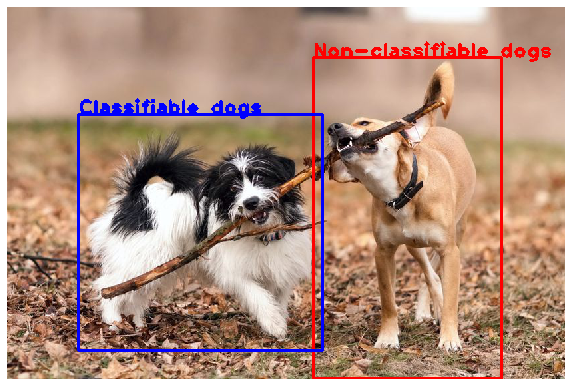

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(plot_box(img,results))
ax.axis('off')
plt.show()